In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/wqi_results.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy subset cần vẽ
subset = df.iloc[:, 5:-3]

# Giả sử cột WQI nằm trong DataFrame
correlation_with_wqi = subset.corrwith(df["WQI"]).sort_values(ascending=False)
print(correlation_with_wqi)


WQI                  1.000000
pH                   0.176362
N_NH4                0.006734
P_PO4               -0.031184
Hg                  -0.049506
N_NO3               -0.088902
Pb                  -0.095956
DO                  -0.197377
As                  -0.198650
Zn                  -0.216220
Ecoli               -0.216326
Coliform            -0.261466
Cu                  -0.263485
N_NO2               -0.276158
Cr6                 -0.278329
Cd                  -0.287929
Heptachlor          -0.312747
DDTs                -0.338767
Dieldrin            -0.343186
Aldrin              -0.399658
Heptachlorepoxide   -0.399744
BOD5                -0.400287
COD                 -0.411988
TOC                 -0.416845
BHC                 -0.433073
T                         NaN
dtype: float64


/home/thuy/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/thuy/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Các biến có tương quan cao | tên biến phải chính xác như trong df
selected_features = [
    "BOD5", "COD", "TOC", "BHC", "Cd", "Cr6"
]

X = df[selected_features]
y = df["WQI"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [2]:
import joblib
# joblib.dump(model, "model/model_wqi.pkl")
model = joblib.load("features/wqi_predictor/model/model_wqi.pkl")

In [8]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 4.97
R² Score: 0.83


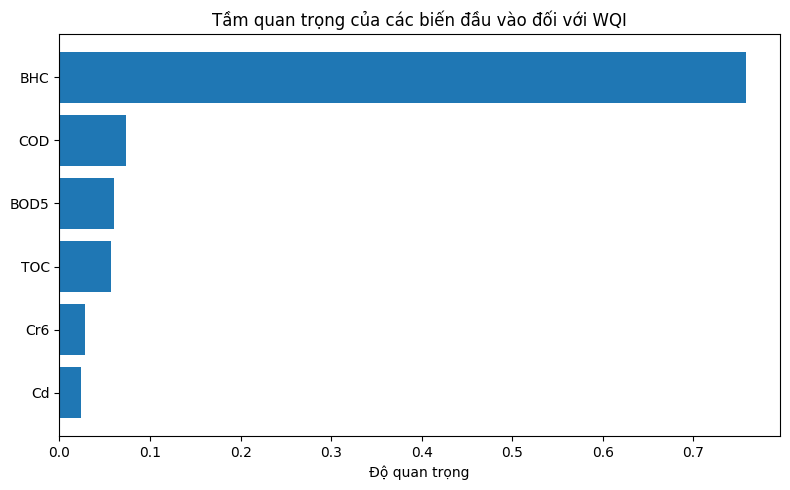

In [9]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(8, 5))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Độ quan trọng")
plt.title("Tầm quan trọng của các biến đầu vào đối với WQI")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [10]:
def predict_wqi(model, input_data):
    """
    Dự đoán giá trị WQI từ input gồm 4 biến đầu vào.

    Parameters:
        model: mô hình đã huấn luyện với các biến BOD5, COD, TOC, BHC.
        input_data: dict chứa giá trị các biến cần thiết.

    Returns:
        Giá trị WQI dự đoán.
    """
    import pandas as pd

    feature_order = ["BOD5", "COD", "TOC", "BHC", "Cd", "Cr6"]
    input_df = pd.DataFrame([input_data])[feature_order]
    prediction = model.predict(input_df)[0]
    return prediction


In [11]:
new_sample = {
    "BOD5": 3.5,
    "COD": 15.2,
    "TOC": 4.8,
    "BHC": 0.1,
    "Cd": 0.01,
    "Cr6": 0.02,
}

predicted_wqi = predict_wqi(model, new_sample)
print(f"Dự đoán WQI: {predicted_wqi:.2f}")


Dự đoán WQI: 22.59
